In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import re
import platform
import importlib
import netCDF4
import multiprocessing as mp
import itertools

user_name = input("Your home folder's user name?")

if platform.system() == 'Darwin':  # macOS
    base_FP = f'/Users/{user_name}/data'
    cpuserver_data_FP = f'/Users/{user_name}/cpuserver_data'
elif platform.system() == 'Linux':
    base_FP = f'/home/{user_name}/data'
    cpuserver_data_FP = f'/home/{user_name}/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
print(base_FP, cpuserver_data_FP)
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import develop_HydroAI.HydroAI.HLS as hHLS
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
import HydroAI.Grid as hGrid
importlib.reload(hHLS);
importlib.reload(hPlot);
importlib.reload(hData);
importlib.reload(hGrid);

Your home folder's user name? subin


/home/subin/data /home/subin/cpuserver_data


/home/subin/miniconda3/envs/cuml_env/lib/python3.10/site-packages/optuna/study/_optimize.py:20: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from optuna import progress_bar as pbar_module


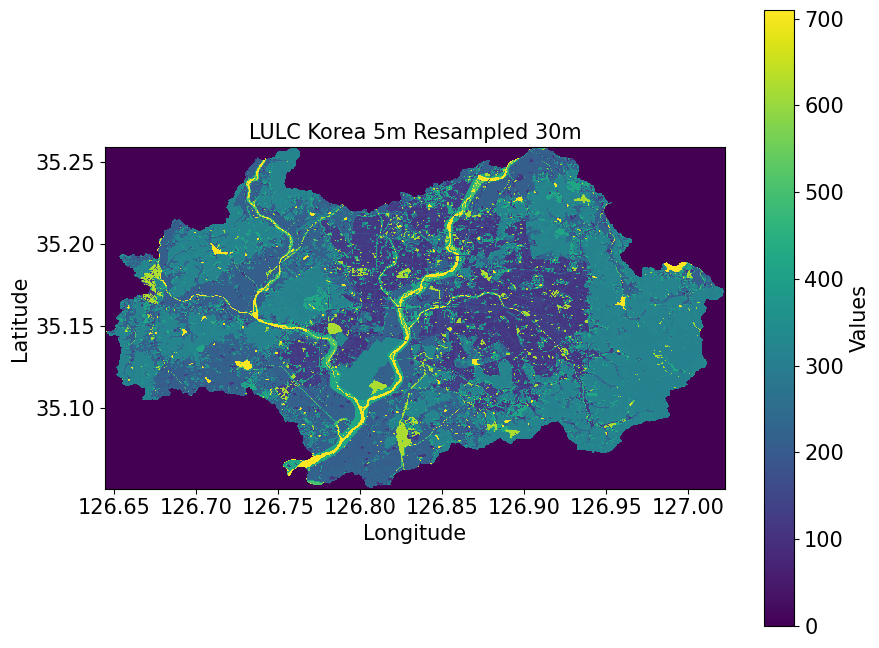

In [12]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

# Open the GeoTIFF file
#file_path = f'{cpuserver_data_FP}/LULC/ROK/South_Korea/LULC_Korea_5m_resampled_30m.tif'
file_path = f'{cpuserver_data_FP}/LULC/ROK/Gwangju/Gwangju_30m.tif'

with rasterio.open(file_path) as src:
    # Read the data from the first band (assuming single band data)
    data = src.read(1)
    
    # Get the coordinates for the pixels
    transform = src.transform
    width = src.width
    height = src.height

    # Get the bounds (left, bottom, right, top)
    bounds = src.bounds
    
    # Generate latitude and longitude for each pixel
    lon = np.linspace(bounds.left, bounds.right, width)
    lat = np.linspace(bounds.top, bounds.bottom, height)
    
    # Create meshgrid for plotting
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(lon_grid, lat_grid, data, cmap='viridis')
    plt.colorbar(label="Values")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("LULC Korea 5m Resampled 30m")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [5]:
np.nanmax(data)

720.0

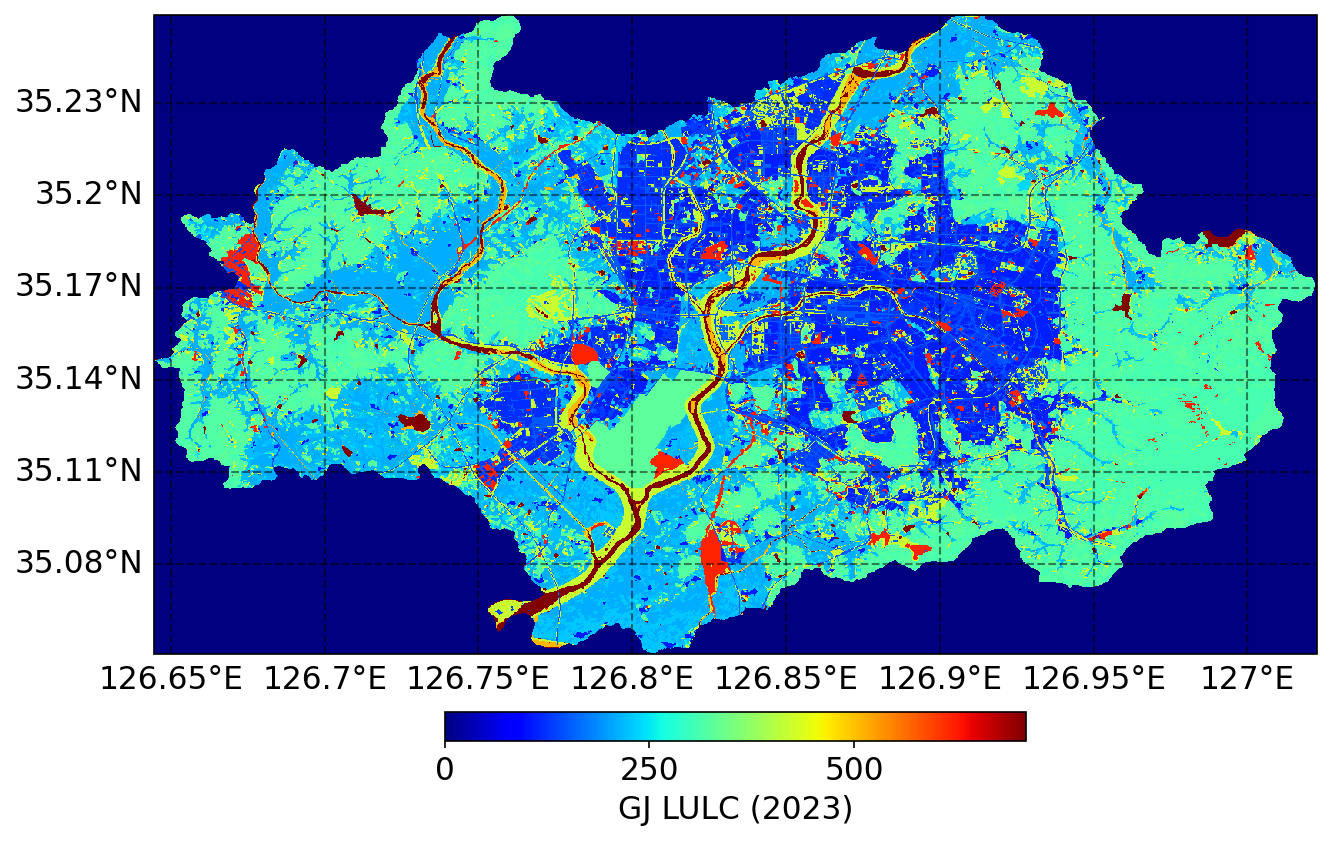

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [14]:
target = data
hPlot.plot_map(lon_grid, lat_grid, target, np.nanmin(target), np.nanmax(target), label_title='GJ LULC (2023)', projection='PlateCarree',
              point=)

In [10]:
print(np.unique(target))

[0.]
